# **# Pre-entrega de Trabajo Final - Data Science 2025**
## Análisis de la Deforestación en Argentina (2001–2020)

Este proyecto tiene como objetivo principal analizar cómo ha evolucionado la deforestación en el territorio argentino entre los años 2001 y 2020. A partir de datos oficiales, exploramos patrones espaciales y temporales de pérdida de cobertura vegetal, identificando las provincias y departamentos más afectados.

Utilizamos herramientas de análisis de datos para limpiar, transformar y visualizar la información, con el fin de facilitar su comprensión y aportar valor en la discusión sobre el impacto ambiental.

**Integrantes del equipo**:
- Cruz Nicole
- Ulloa Soto Melina Gimena

---


1. CARGA Y LIMPIEZA DE DATOS

In [1]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Argentina_Territorial_Deforestacion_2001-2020 - Argentina_Territorial_Deforestacion_2001-2020.csv to Argentina_Territorial_Deforestacion_2001-2020 - Argentina_Territorial_Deforestacion_2001-2020.csv


In [4]:
# Carga del archivo
df= pd.read_csv('Argentina_Territorial_Deforestacion_2001-2020 - Argentina_Territorial_Deforestacion_2001-2020.csv')

In [5]:
# Ver las primeras filas
df.head()

,year,country,country_iso2,region,region_trase_id,parent_region,parent_region_trase_id,deforestation_hectares
0,2001,ARGENTINA,AR,12 DE OCTUBRE,AR-22036,CHACO,AR-22,2281.401340
1,2001,ARGENTINA,AR,1º DE MAYO,AR-22126,CHACO,AR-22,199.175695
2,2001,ARGENTINA,AR,25 DE MAYO,AR-22168,CHACO,AR-22,315.433401
3,2001,ARGENTINA,AR,2 DE ABRIL,AR-22039,CHACO,AR-22,293.300178
4,2001,ARGENTINA,AR,9 DE JULIO,AR-22105,CHACO,AR-22,671.230102


In [6]:
# Ver cantidad de filas y columnas
df.shape

(2380, 8)

In [7]:
# Ver los tipos de datos
df.dtypes

,0
year,int64
country,object
country_iso2,object
region,object
region_trase_id,object
parent_region,object
parent_region_trase_id,object
deforestation_hectares,float64


In [8]:
# Ver si hay datos nulos
df.isnull().sum()

,0
year,0
country,0
country_iso2,0
region,0
region_trase_id,0
parent_region,0
parent_region_trase_id,0
deforestation_hectares,0


In [9]:
# Corroborar que no hay filas duplicadas
df.duplicated().sum()

np.int64(0)

In [10]:
# Descripcion estadistica
df.describe()


,year,deforestation_hectares
count,2380.000000,2380.000000
mean,2010.500000,3098.446824
std,5.767493,6379.703458
min,2001.000000,0.317285
25%,2005.750000,227.069872
50%,2010.500000,812.985496
75%,2015.250000,2993.893930
max,2020.000000,74292.788970


In [11]:
# Obesrvamos que nombre tienen las columnas y luego renombrarlas
df.columns

Index(['year', 'country', 'country_iso2', 'region', 'region_trase_id',
       'parent_region', 'parent_region_trase_id', 'deforestation_hectares'],
      dtype='object')

In [12]:
# Renombramos las columnas
df.columns=['Año', 'Pais', 'Cod_Pais', 'Departamento', 'Cod_Depto', 'Provincia', 'Cod_Prov', 'Hectareas']
df.head()

,Año,Pais,Cod_Pais,Departamento,Cod_Depto,Provincia,Cod_Prov,Hectareas
0,2001,ARGENTINA,AR,12 DE OCTUBRE,AR-22036,CHACO,AR-22,2281.401340
1,2001,ARGENTINA,AR,1º DE MAYO,AR-22126,CHACO,AR-22,199.175695
2,2001,ARGENTINA,AR,25 DE MAYO,AR-22168,CHACO,AR-22,315.433401
3,2001,ARGENTINA,AR,2 DE ABRIL,AR-22039,CHACO,AR-22,293.300178
4,2001,ARGENTINA,AR,9 DE JULIO,AR-22105,CHACO,AR-22,671.230102


In [13]:
# Eliminamos las columnas  innecesarias
df.drop(['Cod_Pais', 'Cod_Depto', 'Cod_Prov'], axis=1, inplace=True)

In [14]:
# Observamos cambios aplicados
df.head()

,Año,Pais,Departamento,Provincia,Hectareas
0,2001,ARGENTINA,12 DE OCTUBRE,CHACO,2281.401340
1,2001,ARGENTINA,1º DE MAYO,CHACO,199.175695
2,2001,ARGENTINA,25 DE MAYO,CHACO,315.433401
3,2001,ARGENTINA,2 DE ABRIL,CHACO,293.300178
4,2001,ARGENTINA,9 DE JULIO,CHACO,671.230102


2 . ANÁLISIS DE DATOS

In [15]:
# Provincia con más deforestación
provincia_mas_deforestada = df.groupby('Provincia')['Hectareas'].sum().idxmax()
print("Provincia con más deforestación:", provincia_mas_deforestada)

Provincia con más deforestación: SANTIAGO DEL ESTERO


In [16]:
# Departamento con más deforestación
departamento_mas_deforestado = df.groupby('Departamento')['Hectareas'].sum().idxmax()
print("Departamento con más deforestación:", departamento_mas_deforestado)

Departamento con más deforestación: ANTA


In [17]:
# Año con más deforestación
fecha_con_mas_deforestacion = df.groupby('Año')['Hectareas'].sum().idxmax()
print("Año con más deforestación:", fecha_con_mas_deforestacion)

Año con más deforestación: 2020


In [18]:
# Valor de hectareas más alto registrado
df['Hectareas'].max()

74292.78897

In [19]:
# ¿Dónde y cuándo ocurrió?
df[df['Hectareas'] == df['Hectareas'].max()]

,Año,Pais,Departamento,Provincia,Hectareas
433,2004,ARGENTINA,MORENO,SANTIAGO DEL ESTERO,74292.78897


In [20]:
# Cuantas hectareas se perdieron en total cada año
promedio_nacional_por_año = df.groupby('Año')['Hectareas'].sum()
print(promedio_nacional_por_año)

Año
2001    239102.529124
2002    381797.872811
2003    739981.719122
2004    534437.666264
2005    420130.274423
2006    478633.233167
2007    550036.450832
2008    654570.511876
2009    446844.134908
2010    414758.823675
2011    263216.121051
2012    253808.264519
2013    167851.835075
2014    142319.794837
2015    116855.221473
2016    132099.554493
2017    171630.754350
2018    132682.580306
2019    210819.411254
2020    922726.688715
Name: Hectareas, dtype: float64


In [ ]:
# Provincia que fue empeorando año a año (mayor diferencia entre años)
prov_año = df.groupby(['Provincia', 'Año'])['Hectareas'].sum().unstack().fillna(0)
prov_dif = (prov_año.max(axis=1) - prov_año.min(axis=1)).sort_values(ascending=False)
prov_empeoro = prov_dif.idxmax()
print(f"Provincia que más empeoró en promedio entre años: {prov_empeoro}")

Provincia que más empeoró en promedio entre años: SANTIAGO DEL ESTERO


3. GRÁFICOS

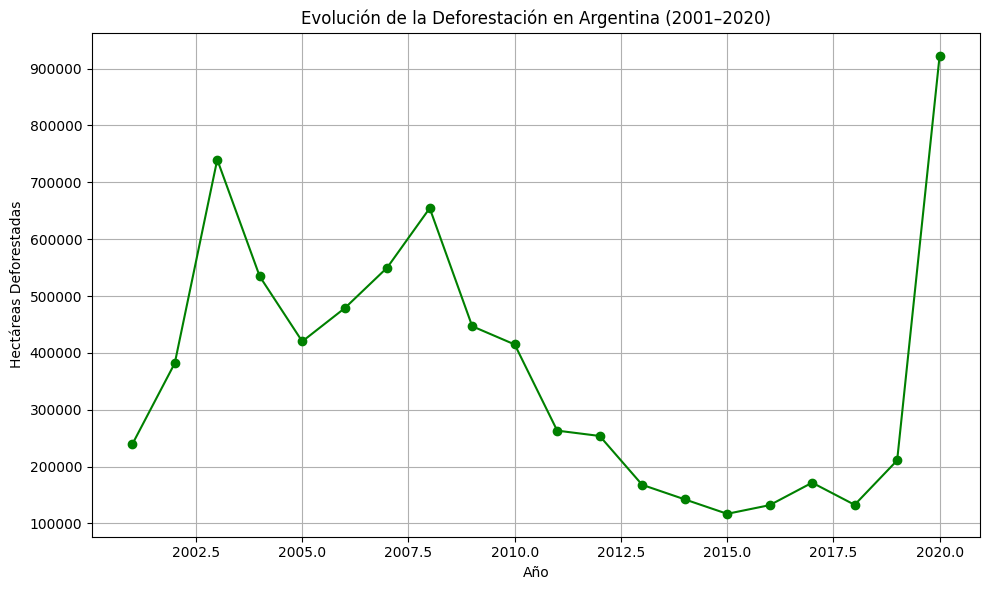

In [21]:
# Evolución de la deforestación en todo el país (2001–2020)
df_anual = df.groupby('Año')['Hectareas'].sum()

plt.figure(figsize=(10, 6))
df_anual.plot(kind='line', marker='o', color='green')
plt.title('Evolución de la Deforestación en Argentina (2001–2020)')
plt.xlabel('Año')
plt.ylabel('Hectáreas Deforestadas')
plt.grid(True)
plt.tight_layout()
plt.show()


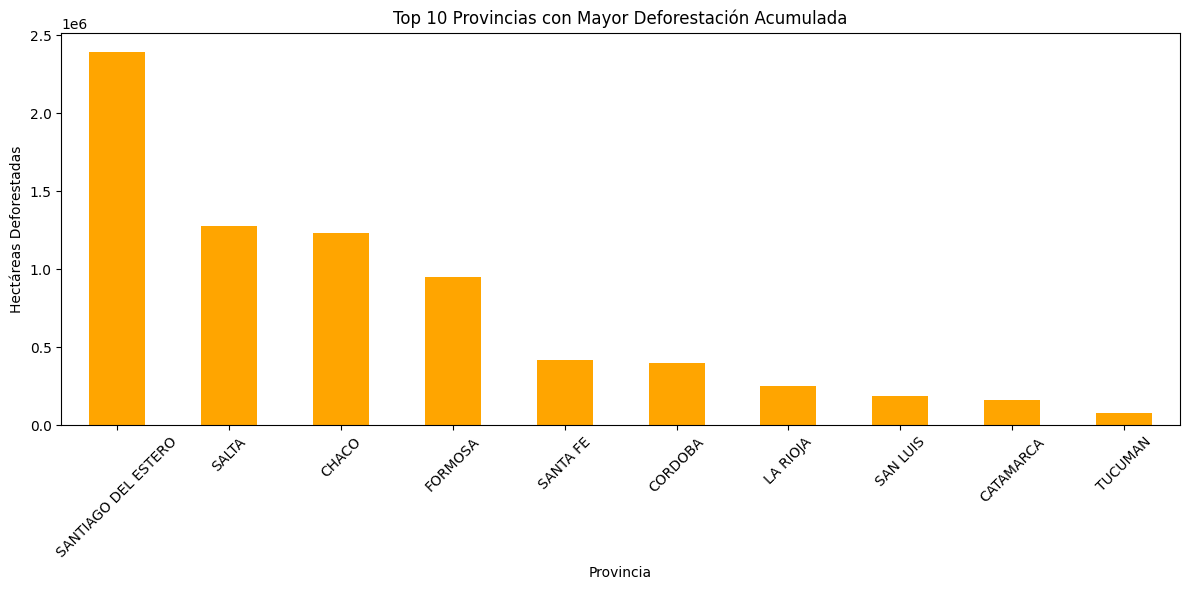

In [22]:
# Provincias con mayor deforestación acumulada (top 10)
df_provincias = df.groupby('Provincia')['Hectareas'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
df_provincias.plot(kind='bar', color='orange')
plt.title('Top 10 Provincias con Mayor Deforestación Acumulada')
plt.xlabel('Provincia')
plt.ylabel('Hectáreas Deforestadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

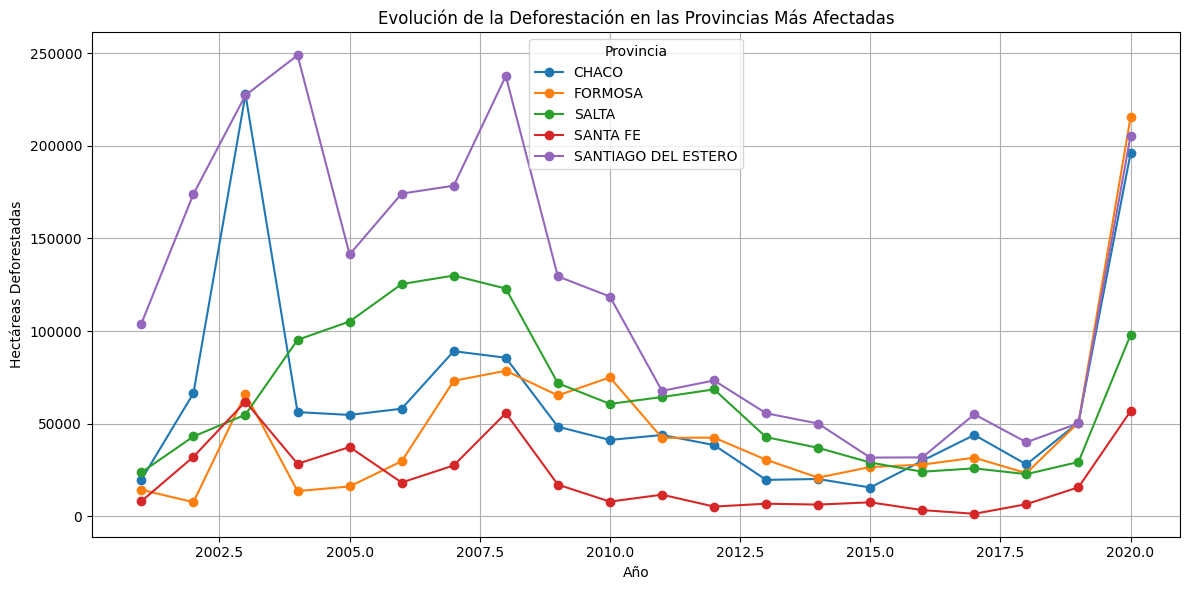

In [ ]:
# Evolución por año en las 5 provincias más afectadas
top5_provs = df_provincias.head(5).index
df_top5 = df[df['Provincia'].isin(top5_provs)]
df_top5_evo = df_top5.groupby(['Año', 'Provincia'])['Hectareas'].sum().unstack()

df_top5_evo.plot(figsize=(12, 6), marker='o')
plt.title('Evolución de la Deforestación en las Provincias Más Afectadas')
plt.xlabel('Año')
plt.ylabel('Hectáreas Deforestadas')
plt.legend(title='Provincia')
plt.grid(True)
plt.tight_layout()
plt.show()

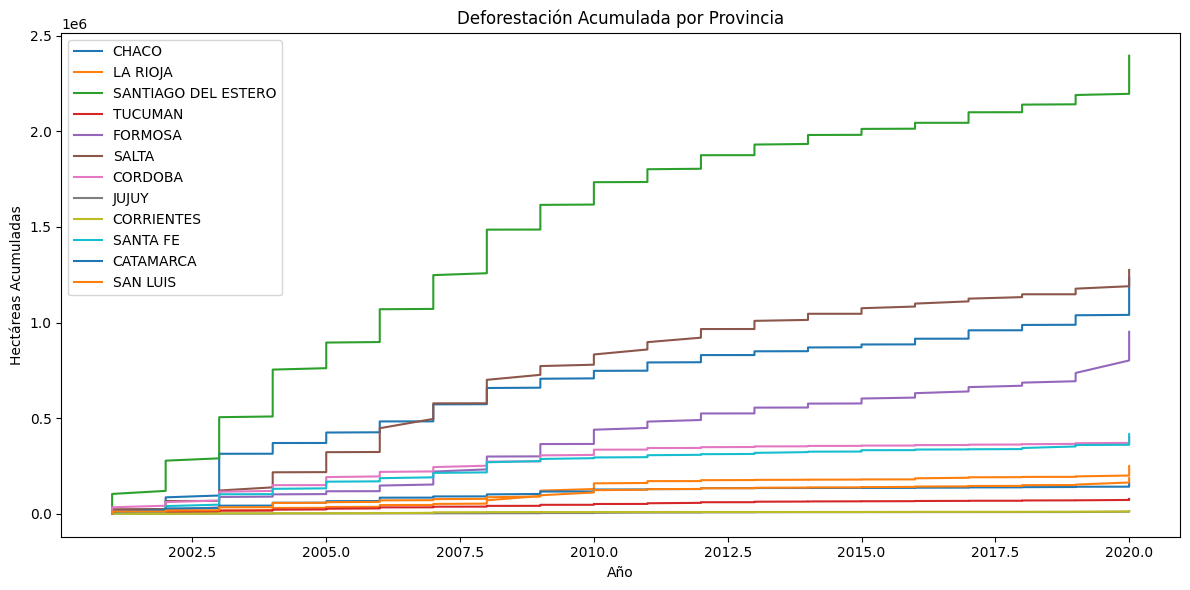

In [ ]:
# Línea de deforestaciÓn acumulada por provincia
df_sorted = df.sort_values(by='Año')
df_sorted['deforestacion_acumulada'] = df_sorted.groupby('Provincia')['Hectareas'].cumsum()
plt.figure(figsize=(12, 6))
for provincia in df_sorted['Provincia'].unique():
    datos = df_sorted[df_sorted['Provincia'] == provincia]
    plt.plot(datos['Año'], datos['deforestacion_acumulada'], label=provincia)
plt.title('Deforestación Acumulada por Provincia')
plt.xlabel('Año')
plt.ylabel('Hectáreas Acumuladas')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-132-4e4b9fd4c326>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


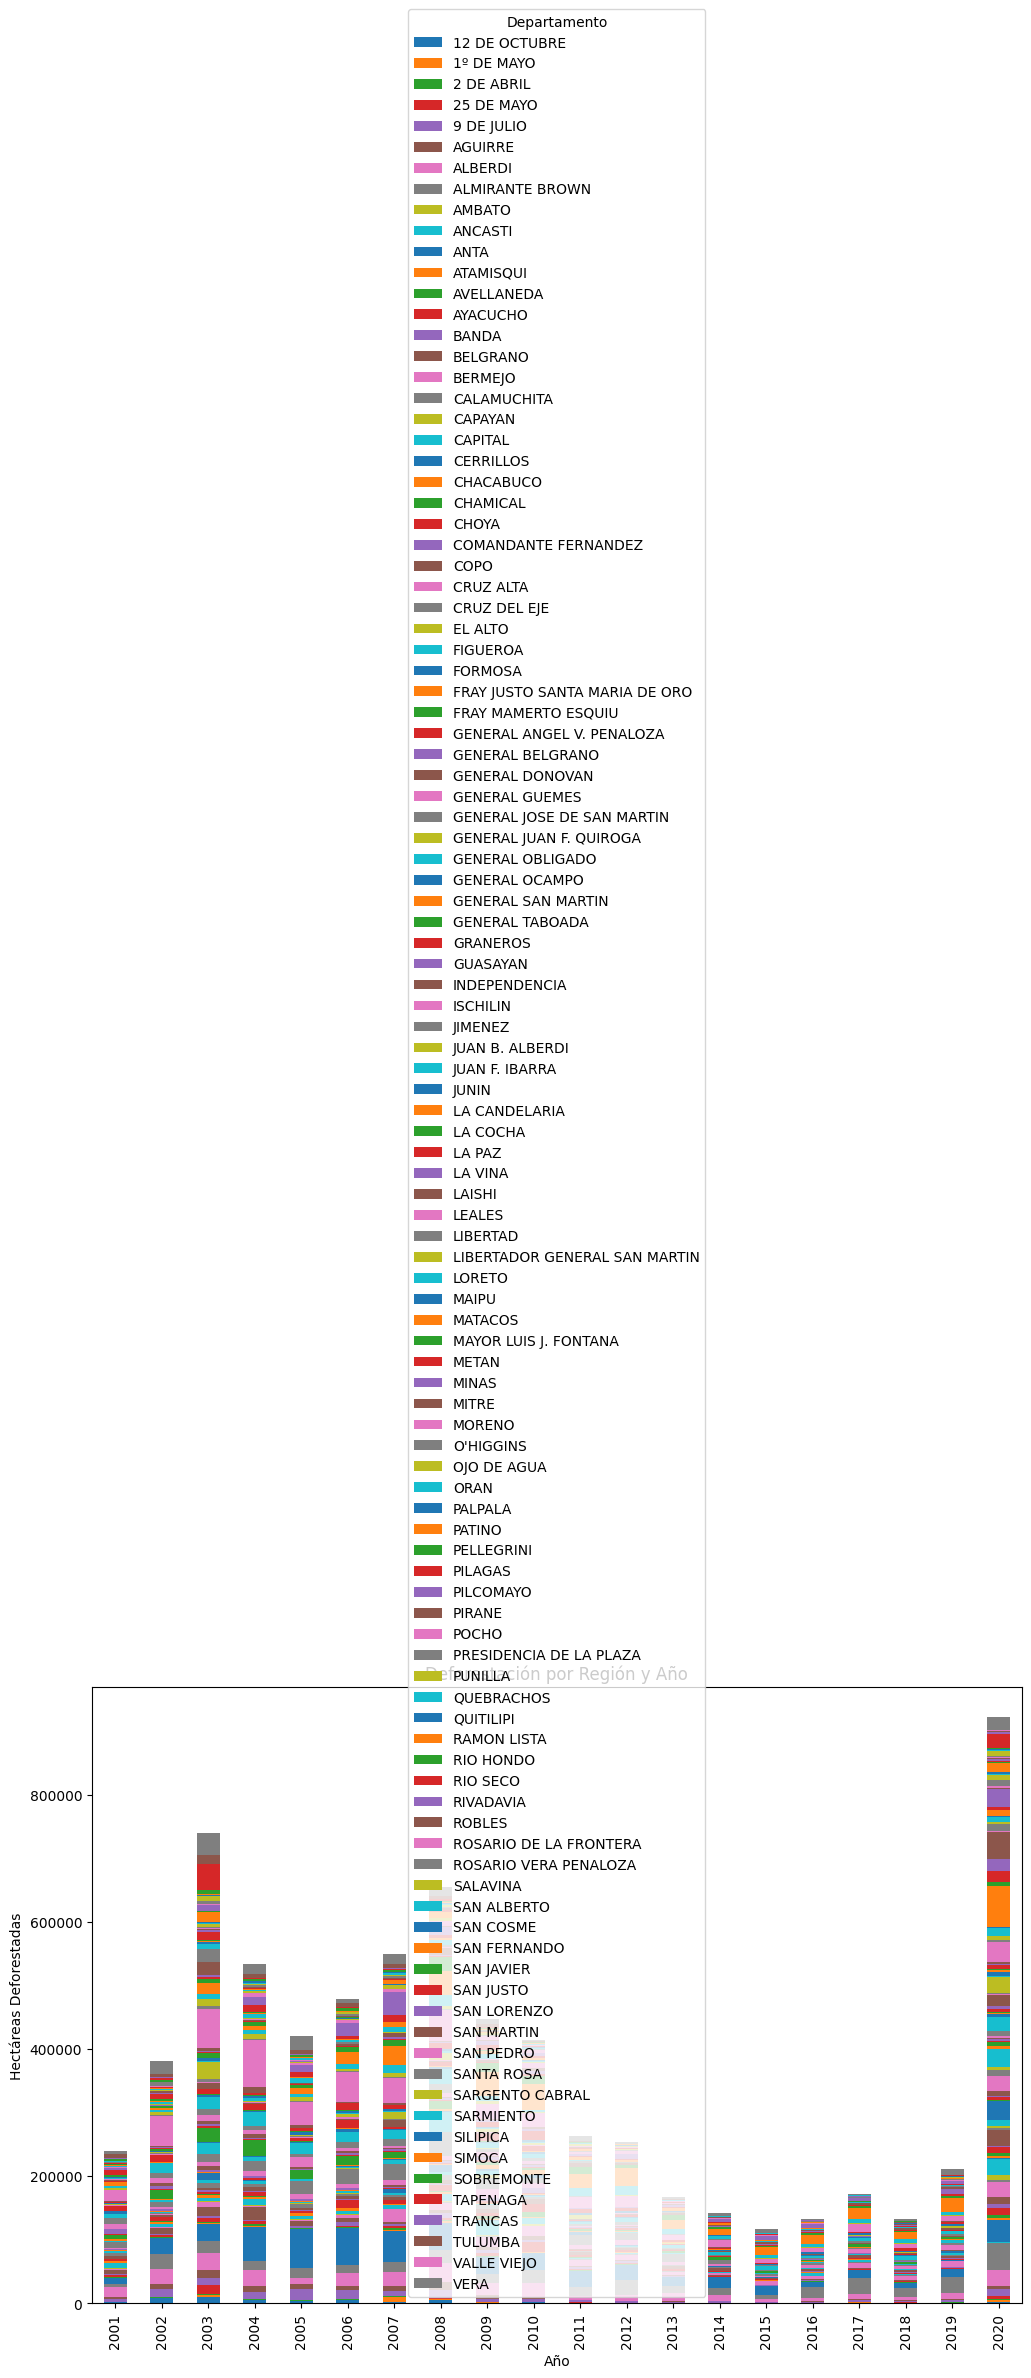

In [ ]:
# Gráfico de barras aplidadas por departamento y año
df_grouped = df.groupby(['Año', 'Departamento'])['Hectareas'].sum().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Deforestación por Región y Año')
plt.xlabel('Año')
plt.ylabel('Hectáreas Deforestadas')
plt.legend(title='Departamento')
plt.tight_layout()
plt.show()

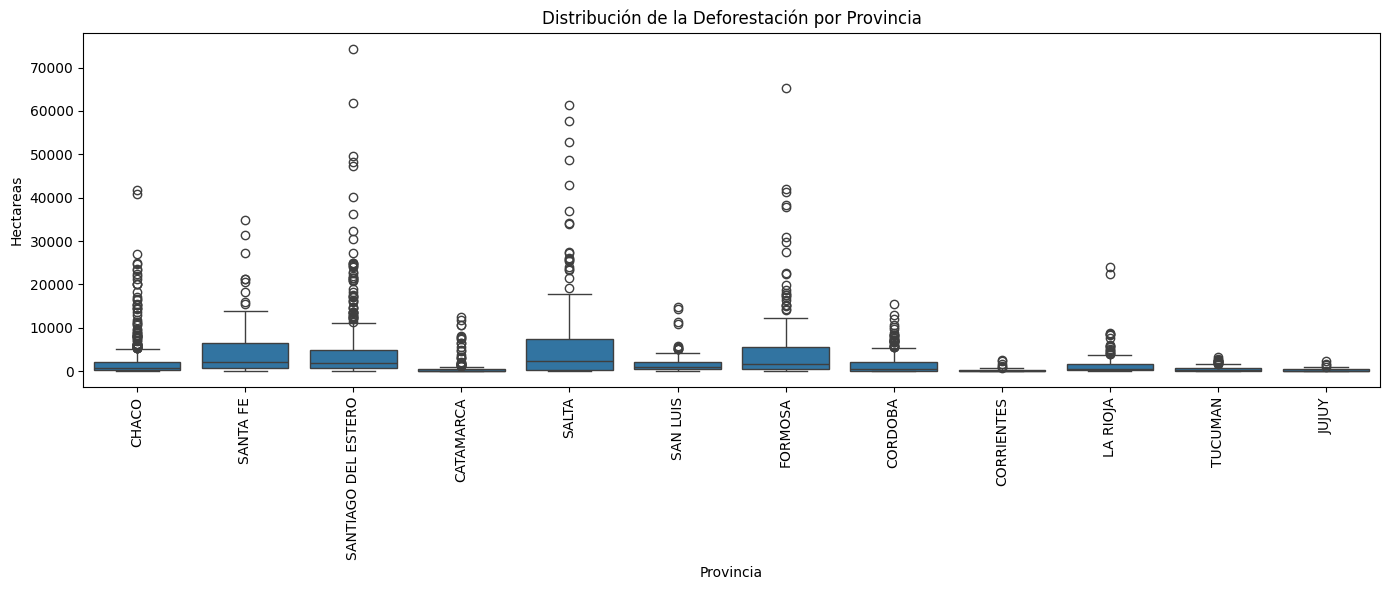

In [23]:
# Boxplot por provincia (distribución de valores)
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Provincia', y='Hectareas')
plt.xticks(rotation=90)
plt.title('Distribución de la Deforestación por Provincia')
plt.tight_layout()
plt.savefig('boxplot_deforestacion_provincia.png')
plt.show()